In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

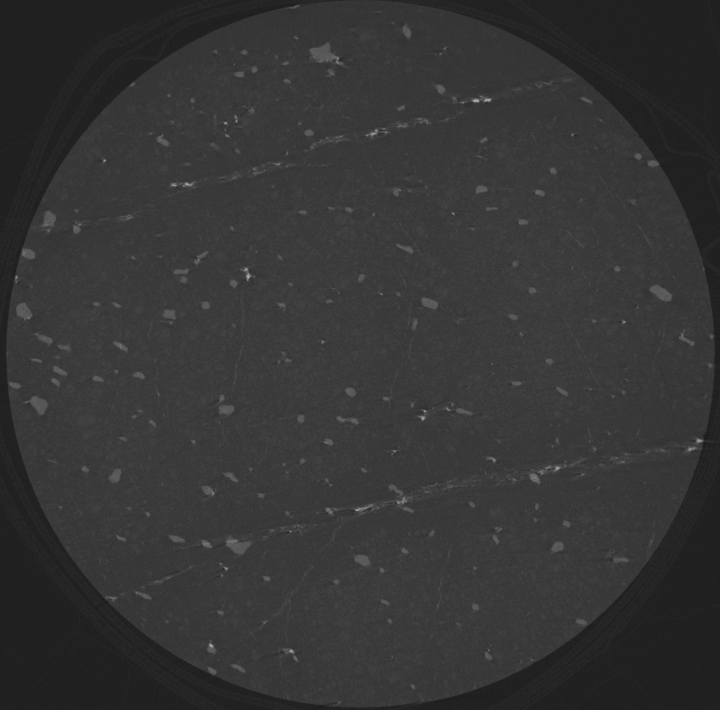

In [3]:
# Load the grayscale PNG images
images_path = '../../Rock_CT_images/1A-135k-Data/'
import os
images = os.listdir(images_path)
images = [i for i in images if i.endswith('.png')]
images = [images_path + i for i in images]

def load_preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale (L mode)
    # Crop the image to the region of interest
    image = image.crop((280, 110, 1000, 820))
    return image

image = load_preprocess_image(images[3])
image

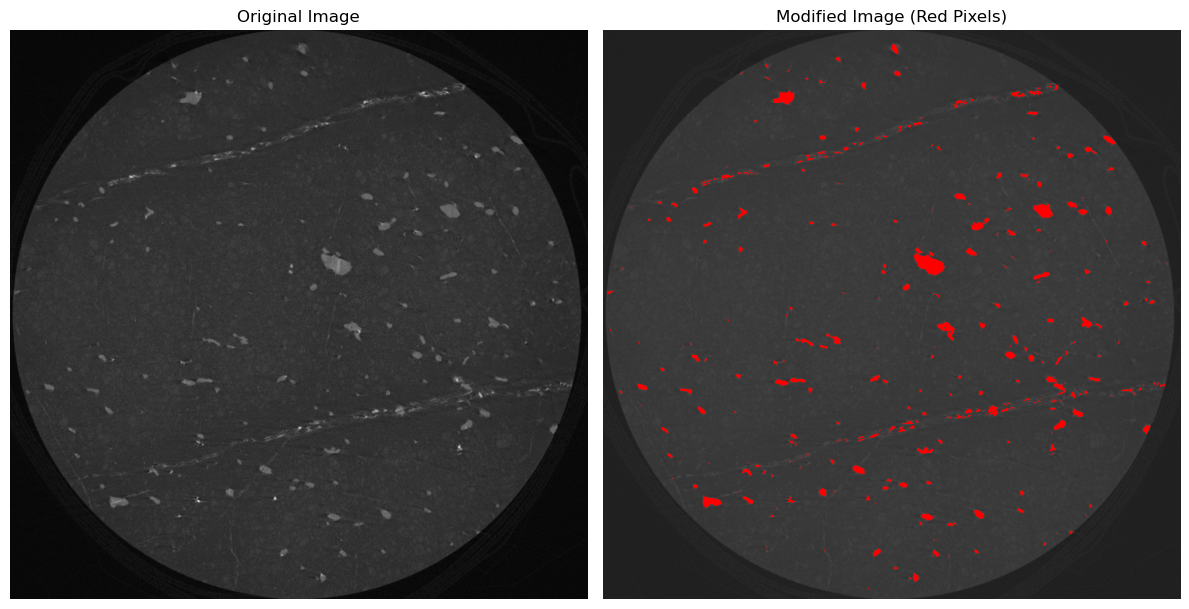

In [4]:
# Define a threshold
threshold = 75  

for image_path in images:
    # Load and preprocess the image
    image = load_preprocess_image(image_path)
    
    # Convert the image to a NumPy array
    image_array = np.array(image)
    
    # Create an RGB version of the image
    rgb_image_array = np.stack([image_array]*3, axis=-1) 
    
    # Change pixels above the threshold to red
    rgb_image_array[image_array > threshold] = [255, 0, 0] 
    
    # Convert back to an image for display
    modified_image = Image.fromarray(rgb_image_array.astype('uint8'))
    
    # Display the original and modified images
    plt.figure(figsize=(12, 6))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    # Modified image
    plt.subplot(1, 2, 2)
    plt.imshow(modified_image)
    plt.title("Modified Image (Red Pixels)")
    plt.axis('off')
    
    plt.tight_layout()
    # save the plot in new directory with the same name as the image
    # plot_output_path = 'modified_images_threshold/' + image_path.split('/')[-1].replace('.png', '_modified.png')
    # plt.savefig(plot_output_path) 
    break
    plt.close()
 



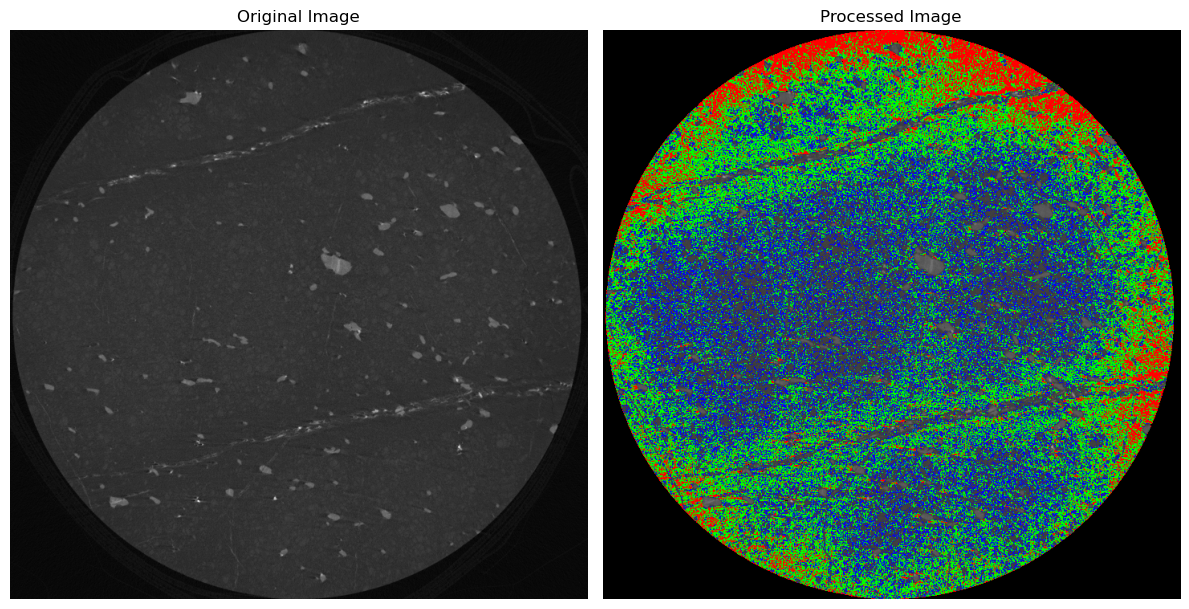

In [5]:
import cv2
from sklearn.cluster import KMeans


for image_path in images:
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Crop the image to the region of interest
    image = image[110:820, 280:1000]
    
    # Reshape the image data for clustering
    pixels = image.reshape(-1, 1)
    
    # Apply KMeans clustering to identify light spots
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.labels_.reshape(image.shape)
    
    # Determine which cluster corresponds to the light spots (higher intensity)
    cluster_centers = kmeans.cluster_centers_.flatten()
    light_spot_cluster = np.argmax(cluster_centers)
    
    # Create a binary mask for light spots
    thresholded = np.uint8(labels == light_spot_cluster) * 255

    
    # Convert grayscale image to BGR for coloring
    image_colored = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Change the color of light spots to red
    # image_colored[thresholded == 255] = [0, 0, 255]
    for i in range(3):
        image_colored[labels == np.argmin(cluster_centers)] = [0, 0, 0]
        cluster_centers[np.argmin(cluster_centers)] = 1000
    # image_colored[labels == 1] = [0, 0, 0]
    # image_colored[labels == 9] = [0, 0, 0]
    # image_colored[labels == 4] = [0, 0, 0]
    image_colored[labels == np.argmin(cluster_centers)] = [0, 0, 255]
    cluster_centers[np.argmin(cluster_centers)] = 1000
    image_colored[labels == np.argmin(cluster_centers)] = [0, 255, 0]
    cluster_centers[np.argmin(cluster_centers)] = 1000
    image_colored[labels == np.argmin(cluster_centers)] = [255, 0, 0]
    cluster_centers[np.argmin(cluster_centers)] = 1000
    # image_colored[labels == 3] = [0, 0, 0]
    # image_colored[labels == 8] = [0, 0, 0]
    # image_colored[labels == 2] = [255, 255, 255]
    # image_colored[labels == 5] = [255, 255, 255]
    
    # Display the original and processed images
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Processed Image')
    plt.imshow(cv2.cvtColor(image_colored, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.tight_layout()
    
    break
    # save the plot in new directory with the same name as the image
    # plot_output_path = 'processed_images_kmeans/' + image_path.split('/')[-1].replace('.png', '_processed.png')
    # plt.savefig(plot_output_path)
    # plt.close()


In [6]:
labels.shape

(710, 720)

In [7]:
cluster_centers

array([1000.        , 1000.        ,   77.5819209 ,   61.04073023,
       1000.        ,   92.18176292, 1000.        , 1000.        ,
         65.5155467 , 1000.        ])

In [8]:
colors

UsageError: %colors: you must specify a color scheme. See '%colors?'


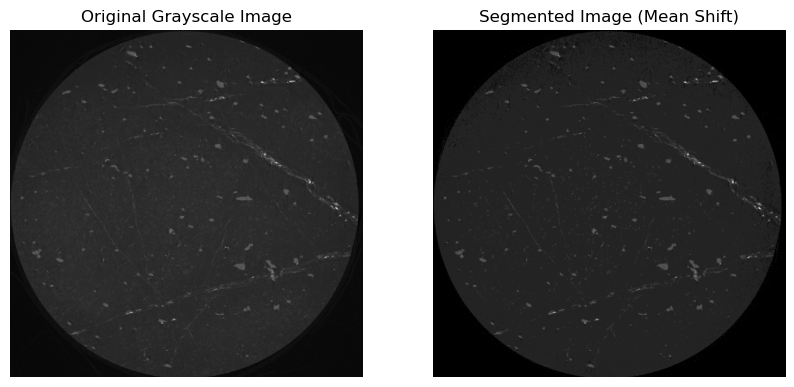

In [9]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# Load the grayscale image
gray_image = load_preprocess_image(images[15])
gray_image = np.array(gray_image)

# Reshape the image into a feature vector for clustering
pixels = gray_image.flatten()  # Convert to 1D array
pixels = pixels.reshape(-1, 1)  # Make it a 2D array, each intensity as a feature

# Estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(pixels, quantile=0.2, n_samples=1000)

# Apply Mean Shift clustering
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(pixels)

# Get the labels and cluster centers
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# Map each pixel to its cluster center
segmented_image = cluster_centers[labels].reshape(gray_image.shape)

# Convert the segmented image to uint8 for display
segmented_image = np.uint8(segmented_image)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmented Image (Mean Shift)")
plt.imshow(segmented_image, cmap="gray")
plt.axis("off")

plt.show()


In [10]:
#count how many differnt cluster_centers are there
unique_cluster_centers = np.unique(segmented_image)
len(unique_cluster_centers)

35

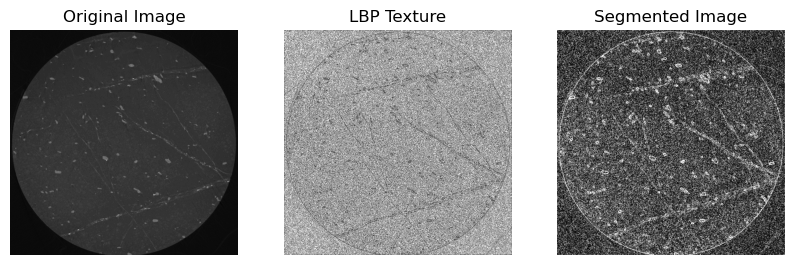

In [11]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# Load the grayscale image
# Load the grayscale image
gray_image = load_preprocess_image(images[19])
image = np.array(gray_image)
# Extract texture features using Local Binary Patterns (LBP)
radius = 1  # Radius for LBP
n_points = 8 * radius  # Number of circular points for LBP
lbp = local_binary_pattern(image, n_points, radius, method="uniform")

# Normalize LBP to 0-255
lbp = (lbp / lbp.max() * 255).astype(np.uint8)

# Combine intensity (grayscale) and texture (LBP) into a single feature vector
h, w = image.shape
features = np.zeros((h * w, 2))  # 2 features: Intensity and LBP
features[:, 0] = image.flatten()  # Grayscale intensity
features[:, 1] = lbp.flatten()  # LBP texture

# Estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(features, quantile=0.1, n_samples=500)

# Apply Mean Shift clustering
mean_shift = MeanShift(bandwidth=35, bin_seeding=True)
mean_shift.fit(features)

# Get cluster centers and labels
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# Reshape the labels to the original image dimensions
segmented_image = labels.reshape((h, w))

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("LBP Texture")
plt.imshow(lbp, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Segmented Image")
plt.imshow(segmented_image, cmap="gray")  # Use colormap to visualize clusters
plt.axis("off")

plt.show()


In [12]:
#count distinct cluster_centers
unique_cluster_centers = np.unique(segmented_image)
len(unique_cluster_centers)

5

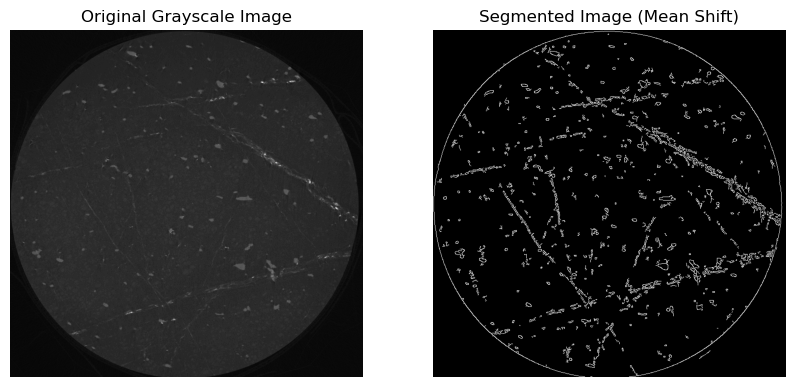

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load the image (replace 'image.jpg' with your image path)
image = load_preprocess_image(images[15])
gray_image = np.array(image)
# Convert to grayscale
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
# blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 20, 50)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmented Image (Mean Shift)")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.show()

Contour Area: 0.0
Contour Perimeter: 6.0
Bounding Box (x, y, w, h): (321, 709, 4, 1)
Hu Moments: [0. 0. 0. 0. 0. 0. 0.]
Contour Area: 0.5
Contour Perimeter: 6.2426406145095825
Bounding Box (x, y, w, h): (230, 685, 2, 3)
Hu Moments: [ 2.22222222e-01  1.23456790e-02  5.48696465e-03  2.19475733e-04
 -2.40849552e-07 -2.43861925e-05  2.34835414e-12]
Contour Area: 69.0
Contour Perimeter: 91.94112491607666
Bounding Box (x, y, w, h): (311, 677, 20, 14)
Hu Moments: [ 3.14179199e-01  2.11449381e-02  1.42637528e-02  3.83209959e-03
  2.65138407e-05 -3.16580831e-04  9.98496054e-06]
Contour Area: 2.0
Contour Perimeter: 26.97056245803833
Bounding Box (x, y, w, h): (271, 675, 5, 6)
Hu Moments: [4.72222222e-01 1.11882716e-01 4.03056360e-02 2.15093486e-02
 5.74799803e-04 5.33444579e-03 2.65895598e-04]
Contour Area: 13.0
Contour Perimeter: 18.485281229019165
Bounding Box (x, y, w, h): (479, 671, 5, 7)
Hu Moments: [1.78033177e-01 3.71546380e-03 1.17422962e-04 1.31668864e-05
 3.42718960e-10 3.02669538e-07 

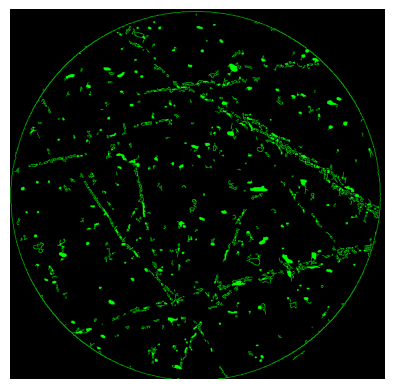

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'image.jpg' with your image path)

image = edges

# Threshold the image to get a binary image
_, binary_image = cv2.threshold(image, 10, 20, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to color for visualization
blank = cv2.cvtColor(np.ones(image.shape, dtype=np.uint8), cv2.COLOR_GRAY2BGR)  # Convert to color for visualization
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), thickness=cv2.FILLED)

# Geometric Descriptors
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)
    
    # Calculate the perimeter of the contour (arc length)
    perimeter = cv2.arcLength(contour, True)
    
    # Bounding Box
    x, y, w, h = cv2.boundingRect(contour)
    
    # Moments
    moments = cv2.moments(contour)
    
    # Hu Moments (invariant moments)
    huMoments = cv2.HuMoments(moments).flatten()

    # Display the geometric descriptors
    print(f"Contour Area: {area}")
    print(f"Contour Perimeter: {perimeter}")
    print(f"Bounding Box (x, y, w, h): ({x}, {y}, {w}, {h})")
    print(f"Hu Moments: {huMoments}")

# Display the contour image with the bounding box
plt.imshow(contour_image)
plt.axis('off')
plt.show()


In [15]:
import cv2
import numpy as np
import pandas as pd
data = []

for image_path in images:

    image = load_preprocess_image(image_path)
    gray_image = np.array(image)
    # Convert to grayscale
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    # blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, 20, 50)
    # Load the image
    image = edges

    # Apply edge detection
    edges = cv2.Canny(image, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Initialize global variables
    drawing = False
    labels = np.zeros(len(contours), dtype=int)  # Default label 0
    display_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    mask = np.zeros_like(image, dtype=np.uint8)
    brush_size = 5  # Default brush size
    cursor_position = None
    radius_threshold = 10  # Radius for counting nearby contours

    def draw_brush(event, x, y, flags, param):
        global drawing, cursor_position
        cursor_position = (x, y)
        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
        elif event == cv2.EVENT_MOUSEMOVE and drawing:
            cv2.circle(mask, (x, y), brush_size, 255, -1)  # Draw on mask
        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            label_contours()
        update_display()

    def label_contours():
        global labels
        for i, contour in enumerate(contours):
            for point in contour:
                px, py = point[0]
                if mask[py, px] == 255:
                    labels[i] = 1  # Mark as inside selected zone
                    break

    def count_nearby_contours(contour, index):
        x, y, w, h = cv2.boundingRect(contour)
        center_x, center_y = x + w // 2, y + h // 2
        count = 0
        min_distance = float('inf')
        for j, other_contour in enumerate(contours):
            if j == index:
                continue
            ox, oy, ow, oh = cv2.boundingRect(other_contour)
            other_center_x, other_center_y = ox + ow // 2, oy + oh // 2
            distance = np.sqrt((center_x - other_center_x) ** 2 + (center_y - other_center_y) ** 2)
            if distance < radius_threshold:
                count += 1
            min_distance = min(min_distance, distance)
        return count, min_distance

    def update_display():
        temp_display = display_image.copy()
        for i, contour in enumerate(contours):
            color = (0, 0, 255) if labels[i] == 1 else (0, 255, 0)
            cv2.drawContours(temp_display, [contour], -1, color, 1)
        if cursor_position:
            cv2.circle(temp_display, cursor_position, brush_size, (200, 200, 200), 1)  # Draw brush preview
        cv2.imshow("Contours", temp_display)

    def save_data():
        for i, contour in enumerate(contours):
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            x, y, w, h = cv2.boundingRect(contour)
            h1, h2, h3, h4, h5, h6, h7 = cv2.HuMoments(cv2.moments(contour)).flatten().tolist()
            nearby_count, min_distance = count_nearby_contours(contour, i)
            data.append([i, area, perimeter, x, y, w, h, h1, h2, h3, h4, h5, h6, h7, nearby_count, min_distance, labels[i]])
        

    def refresh_image():
        global labels, mask, display_image
        labels = np.zeros(len(contours), dtype=int)
        mask.fill(0)
        display_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # Reset display image
        update_display()

    # Show initial contours
    update_display()
    cv2.setMouseCallback("Contours", draw_brush)
    break_all = False
    while True:
        key = cv2.waitKey(10) & 0xFF
        if key == ord('r'):
            refresh_image()
        elif key == ord('s'):
            save_data()
            break
        elif key == 27:  # ESC key
            break_all =True
            break
        update_display()

    if break_all:
        break

df = pd.DataFrame(data, columns=['id', 'area', 'perimeter', 'x', 'y', 'w', 'h', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'nearby_contours', 'min_distance', 'label'])
df.to_csv("contours_labeled.csv", index=False)
print("Data saved to contours_labeled.csv")
cv2.destroyAllWindows()

Data saved to contours_labeled.csv


In [15]:
import pandas as pd

data = pd.read_csv("contours_labeled.csv")
data.head()

,id,area,perimeter,x,y,w,h,h1,h2,h3,h4,h5,h6,h7,nearby_contours,min_distance,label
0,0,0.0,0.000000,377,709,1,1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,23.323808,0
1,1,1.0,8.828427,301,705,5,2,0.250000,0.034722,1.689677e-15,6.376464e-15,1.879413e-29,1.517883e-16,-9.211447e-30,1,6.324555,0
2,2,20.5,99.355338,306,704,34,6,1.391484,1.841362,8.856145e+00,8.743705e+00,7.694237e+01,1.184547e+01,-7.438181e-03,0,13.038405,0
3,3,0.0,8.000000,295,704,5,1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,6.324555,0
4,4,13.0,13.656854,328,694,5,5,0.167906,0.001761,2.685238e-04,4.787628e-06,8.260754e-11,3.466976e-08,1.504777e-10,0,13.038405,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

In [17]:
def Preprocessing(data):
    #Remove id column
    # data = pd.get_dummies(data)
    data = data.drop(columns=['id'])

    #StandardScaler
    sacale = StandardScaler()
    target = data['label']
    data = sacale.fit_transform(data.drop(columns=['label']))
    return data, target.tolist()

In [18]:
train_x, train_y = Preprocessing(train_data)
test_x, test_y = Preprocessing(test_data)

In [19]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

lcf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = lcf.fit(train_x, test_x, train_y, test_y)

100%|██████████| 32/32 [00:11<00:00,  2.69it/s]

[LightGBM] [Info] Number of positive: 2533, number of negative: 7637
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2882
[LightGBM] [Info] Number of data points in the train set: 10170, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249066 -> initscore=-1.103600
[LightGBM] [Info] Start training from score -1.103600


In [20]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.93,0.90,0.90,0.93,0.10
BaggingClassifier,0.92,0.87,0.87,0.92,0.27
KNeighborsClassifier,0.87,0.82,0.82,0.87,0.27
LabelPropagation,0.87,0.82,0.82,0.87,2.63
ExtraTreesClassifier,0.89,0.82,0.82,0.89,0.60
LabelSpreading,0.87,0.82,0.82,0.87,3.64
RandomForestClassifier,0.88,0.80,0.80,0.88,0.90
DecisionTreeClassifier,0.73,0.75,0.75,0.75,0.05
AdaBoostClassifier,0.82,0.72,0.72,0.81,0.25


In [38]:
bagging = BaggingClassifier()
bagging.fit(train_x, train_y)

BaggingClassifier()

In [39]:
pred = bagging.predict(test_x)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, test_y)

0.9150609516319308

In [37]:
pred[:1000]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [45]:
import cv2
import numpy as np
import pandas as pd
import joblib  # For loading the model
sacale = StandardScaler()
data = []

for image_path in images:

    image = load_preprocess_image(image_path)
    gray_image = np.array(image)
    # Convert to grayscale
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    # blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, 20, 50)
    # Load the image
    image = edges

    # Apply edge detection
    edges = cv2.Canny(image, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize global variables
    display_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    labels = np.zeros(len(contours), dtype=int)  # Placeholder for model predictions
    brush_size = 5  # Default brush size
    cursor_position = None
    radius_threshold = 50  # Radius for counting nearby contours

    # Function to extract features from contours
    def extract_features():
        data = []
        for i, contour in enumerate(contours):
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            x, y, w, h = cv2.boundingRect(contour)
            hu_moments = cv2.HuMoments(cv2.moments(contour)).flatten()
            nearby_count, min_distance = count_nearby_contours(contour, i)
            data.append([area, perimeter, x, y, w, h, *hu_moments.tolist(), nearby_count, min_distance])
        return np.array(data)

    # Function to count nearby contours
    def count_nearby_contours(contour, index):
        x, y, w, h = cv2.boundingRect(contour)
        center_x, center_y = x + w // 2, y + h // 2
        count = 0
        min_distance = float('inf')
        for j, other_contour in enumerate(contours):
            if j == index:
                continue
            ox, oy, ow, oh = cv2.boundingRect(other_contour)
            other_center_x, other_center_y = ox + ow // 2, oy + oh // 2
            distance = np.sqrt((center_x - other_center_x) ** 2 + (center_y - other_center_y) ** 2)
            if distance < radius_threshold:
                count += 1
            min_distance = min(min_distance, distance)
        return count, min_distance

    # Load model and make predictions (Replace with actual model loading code)
    features = extract_features()
    predictions = bagging.predict(sacale.fit_transform(features))  # Replace this with model predictions
    labels = predictions.astype(int)  # Store predictions

    # Function to update display based on predictions
    def update_display():
        temp_display = display_image.copy()
        for i, contour in enumerate(contours):
            color = (0, 0, 255) if labels[i] == 1 else (0, 255, 0)
            cv2.drawContours(temp_display, [contour], -1, color, 1)
        if cursor_position:
            cv2.circle(temp_display, cursor_position, brush_size, (200, 200, 200), 1)  # Draw brush preview
        cv2.imshow("Contours", temp_display)

    # Show updated contours
    update_display()

    # Wait for user interaction
    while True:
        key = cv2.waitKey(10) & 0xFF
        if key == 27:  # ESC key to exit
            break
        update_display()

# df = pd.DataFrame(data, columns=['id', 'area', 'perimeter', 'x', 'y', 'w', 'h', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'nearby_contours', 'min_distance', 'label'])
# df.to_csv("contours_labeled.csv", index=False)
# print("Data saved to contours_labeled.csv")
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [34]:
features.shape

(2178, 15)